## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

In [1]:
import requests
import requests_cache
import pandas as pd
import time
from plotnine import *
import numpy as np

In [2]:
fresh = pd.read_csv("/Users/Troy/Desktop/fresh.csv")

In [3]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [4]:
key = read_key("/Users/Troy/Desktop/API_key.txt")

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [5]:
def ndb_search(search, key):
    """takes in a string search term (i.e. milk, eggs, etc) and key (i.e. API key)"""
    requests_cache.install_cache("my_cache")
    response = requests.get("https://api.nal.usda.gov/ndb/search/", params = {
    "api_key": key, #setting API key
    "q": search #setting search term 
    })
    time.sleep(1) 
    result = response.json() 
    if result == {'errors': {'error': [{'status': 400,
    'parameter': 'results',
    'message': 'Your search resulted in zero results.Change your parameters and try again'}]}}:
        return [] #returns empty list if result is error message 
    else:
        result_1 = result["list"]
        final = result_1["item"]
        return final #returns final results found in the search

In [6]:
ndb_search("plop",key)

[]

In [7]:
ndb_search("quail eggs", key)

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [8]:
#loop every food in fresh.csv into the NDB function 
food = fresh["food"]
form = fresh["form"]
type_vf = fresh["type"]
listing_numb = []
for i in list(range(0, 49)):
    new0 = (food[i] + " " + form[i]).rstrip("1") #this part takes the two duplicates into account
    new1 = new0.replace(" Fresh", "") #taking out parts that make the search faulty
    new2 = new1.replace(" consumed", "")
    new3 = new2.replace(" green", "")
    new4 = new3.replace(" cabbage", "") #string search term
    new = ndb_search((new4 + " raw"), key) #adding raw to each term for better results
    if new == []:
        food_take_out = food[i].replace("_"," ") #first check... if empty list, check without "_"
        extra_check = ndb_search((food_take_out + " raw"), key)
        if extra_check == []: #second check if first and second list is empty
            lastcheck = ndb_search((food[i] + " " + type_vf[i]), key) #adding type (veg or fruit)
            actual = lastcheck["offset" == 0] #subsetting the best search term (offset 0) 
            ndbno = actual["ndbno"] #subsetting the ndbno number of subsetted offset
            #print(food[i], "is", ndbno) 
            listing_numb = listing_numb + [ndbno]
        else: #first check if first list is empty
            actual = extra_check["offset" == 0] #subsetting for offset 0
            ndbno = actual["ndbno"] #subsetting ndbno number of subsetted offset
            #print(food[i], "is", ndbno)
            listing_numb = listing_numb + [ndbno]
    else: #no extra check required
        actual = new["offset" == 0] #if there is no empty list detected initially 
        ndbno = actual["ndbno"] #same process as others 
        #print(food[i], "is", ndbno)
        listing_numb = listing_numb + [ndbno]

food_number = pd.DataFrame(listing_numb, index = list(range(0,49)), columns = ["ndbno"])

In [9]:
fresh_number = fresh.join(food_number) #note ndbno column 
fresh_number

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09221
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


**Strategy**

Initially, the strategy that I was going for was to subset fresh.csv for the "food" column to get the names. After getting the names, I used the ndb_search() function and added " raw" to search the food name with "raw". Once looping over the 48 different food names in fresh.csv through ndb_search(), I looked at the None values that were returned and assessed why the food names returned None. As observed, a few names such as collard_greens returned None due to the underscore, so if it returned None, I replaced the underscore with a space and researched. "Kiwi" specifically returned None unless fruit was added to it so "type[i]" was added to compensate for that. Lastly, "cabbage" and "cucumbers" were duplicates in names and needed a few revisions such as adding column "form" and then removing/replacing a few characters. Some limitations include offsetting to the first offset (0), which wouldn't always return the right number (such as tangerines whose offset 0 is tangerine juice). 

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [24]:
def ndb_report(ndbno, key):
    """takes ndbno number (must be a string) and API key"""
    requests_cache.install_cache("my_new_cache")
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports/", params = {
        "api_key": key, #API key
        "ndbno": ndbno, #food number
        "type": "b"
    })
    time.sleep(1)
    result = response.json()
    foods_sub = result["foods"] #subset foods
    df = pd.DataFrame(foods_sub) 
    food_sub2 = df["food"] #subset food
    dict_sub = food_sub2[0] #subset first element
    nutrients = dict_sub["nutrients"] #subset nutrients
    return nutrients

In [25]:
raw_plum_nutrients = ndb_report("09279", key)
raw_plum_nutrients[0] #first element of the returned list

{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}

__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

**Question 1: Are fruits typially higher in kilocalories, or vegetables?**

In [26]:
ndbno_use = fresh_number["ndbno"]
overall_kilo_list = []
for i in list(range(0,49)):
    nutrients = ndb_report(ndbno_use[i], key) #loops through each food number 
    energy = nutrients[1] #takes energy from each food in fresh.csv
    kilocalories = [float(energy["value"])] #takes kcal value and changes to float
    overall_kilo_list = overall_kilo_list + kilocalories #taking overall kcals into one list

In [27]:
import warnings

In [29]:
kilocalories_df = pd.DataFrame(overall_kilo_list, index = list(range(0,49)), columns = ["Kcal"])
#making the list a data frame
#kilocalories_df
fresh_kilo = fresh_number.join(kilocalories_df) #joining new kcal dataframe to fresh data frame
#fresh_kilo 
warnings.filterwarnings("ignore")
((fresh_kilo["Kcal"])[12]) = "360" ##warning checked and works fine##
((fresh_kilo["Kcal"])[32]) = "98" ##warning fine as well##
#fresh_kilo

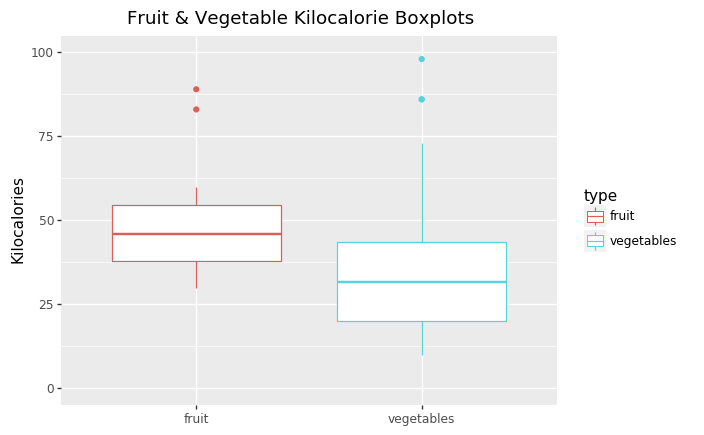

<ggplot: (-9223372029310811297)>

In [30]:
#fruit & vege kilocalorie boxplots
(
    ggplot(fresh_kilo, aes(x = "type",y = "Kcal", color = "type")) + geom_boxplot() 
    + labs(title = "Fruit & Vegetable Kilocalorie Boxplots", y = "Kilocalories", x = "")
    + ylim(0,100) #removing two outliers to make plots more visible
)


**Question 1: Are fruits typically higher in kilocalories, or vegetables?**

To preface, the process that was taken for this question was first looping over each ndbno of each food name in fresh.csv to the function ndb_report(). While looping, I subsetted for energy (kilocalories section), susbsetted for value in the energy subset, and converted the value to float. The loop had each food name's kilocalorie value combined into one list then joined to the original fresh data frame. Lastly, ggplot was used to create boxplots based on type (fruit or vegetable). 

From the foods named in fresh.csv, fruits are typically higher in kilocalories than vegetables. As shown in the two boxplots, fruit's distribution is, overall, higher in kilocalories than the general distribution of vegetables. It is good to note that although fruits typically have a higher kilocalorie count compared to vegetables, this doesn't mean all  fruits will have a higher kilocalorie count than any vegetable. Also, vegetables' range of data is larger compared to that of fruit, which reinforces this (especially since roughly 50% of vegetables distribution matches parts of the fruit distribution...though at different parts of the boxplot). 

Overall, thinking about this logically, it makes sense that the overall distribution of kilocalories for fruits is higher than that of vegetables since fruits are generally known to be high in energy, which translates to kilocalories. Lastly, some limitations of this analysis would be that the sample size of fruit and vegetables have a chance to not be representable of the entire fruit and vegetable populations due to somewhat small sample size. 

**Question 2: Which foods are the best value for the price and which are the worst? (most kilocalories per dollar)**

In [31]:
pound_kcal = (fresh_kilo["Kcal"]*4.53592)
price_per_kcal = (fresh_kilo["price_per_lb"]/pound_kcal)
last_df = pd.DataFrame(price_per_kcal, columns = ["price_per_kcal"])
last_df = fresh_kilo.join(last_df)
ordered_ldf = last_df.sort_values(by = ["price_per_kcal"])
plot_max = ordered_ldf.tail() #top five price to kcal 
plot_min = ordered_ldf.head() #bottom five price to kcal
#np.mean(plot_min["price_per_kcal"])
#np.mean(plot_max["price_per_kcal"])
#np.mean(plot_min["price_per_lb"])
#np.mean(plot_max["price_per_lb"])
#np.mean(plot_min["Kcal"])*4.53592
#np.mean(plot_max["Kcal"])*4.53592

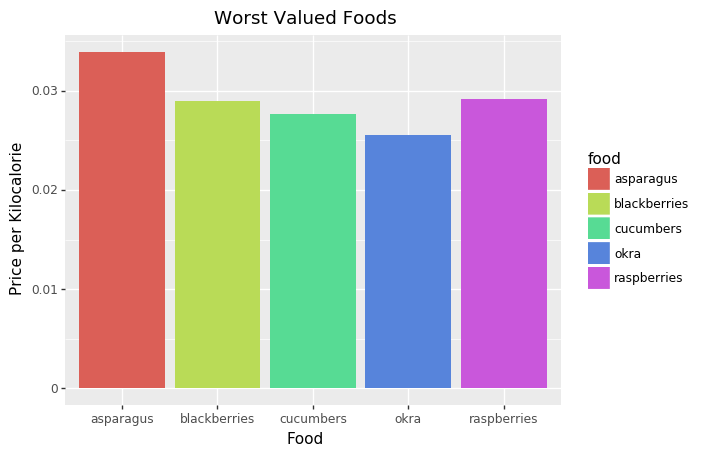

<ggplot: (7544674396)>

In [32]:
(
    ggplot(plot_max, aes(x = "food", y = "price_per_kcal", fill = "food")) + geom_col()
    + labs(title = "Worst Valued Foods", y = "Price per Kilocalorie", x = "Food")  
)

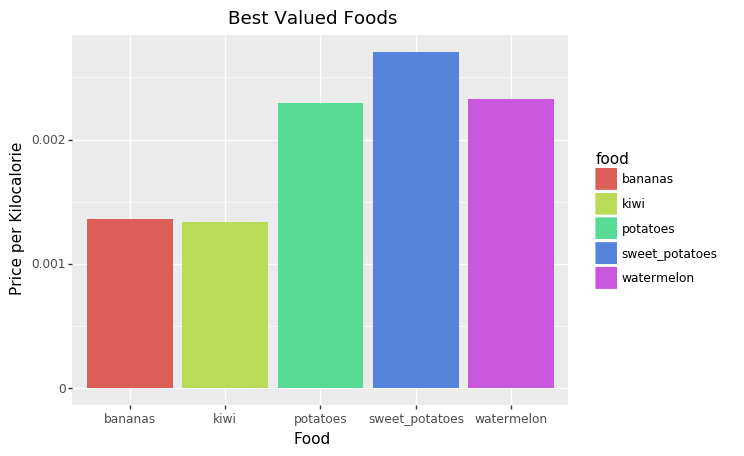

<ggplot: (-9223372029309810744)>

In [33]:
(
    ggplot(plot_min, aes(x = "food", y = "price_per_kcal", fill = "food")) + geom_col()
    + labs(title = "Best Valued Foods", y = "Price per Kilocalorie", x = "Food")
    
)

**Question 2: Which foods are the best value for the price and which are the worst? (most kilocalories per dollar)**

To preface, the process of obtaining the top and bottom five price to kilocalorie ratios were first found by multiplying the kilocalorie data retrieved by 4.53592 since the amount of kilocalories retrieved was equivilant to 100g of the food. Multiplying by 4.53592 converted the kilocalorie values to kilocalories per pound. With this in mind, the column "price per pound" within fresh.csv was divided by the newly found values "kcal_per_lb" to find price per kilocalorie. "head()" and "tail()" were used to subset maximum and minimum values of price per kilocalorie, and then ggplot was used to provide barplots of each. 

Given that the best value for price can be represented by the lowest price to kilocalorie ratio, it was found that asparagus, blackberries, cucumbers, okra, and raspberries gave the worst value for price, which on average, cost 0.029 cents per kilocalorie. On the other hand, bananas, kiwi, potatoes, sweet potatoes, and watermleon were the foods that gave the best value for price, which on average, cost 0.002 cents per kilocalorie.

Through visual diagnostics from the plots, the worst valued foods had fairly similar values with the lowest being 0.0255 price per kilocalorie and highest being 0.0339 price per kilocalorie. In comparison, the five foods with the best value had relatively different values with the lowest being 0.001336 and highest being 0.002703. Keep in mind that the worst valued foods actually differ more in total value but that may be due to them being of larger scaled values. Some more interesting facts to point out is that the average price per pound is equal to 4.138 for the best valued and 0.9411 for the worst valued. In addition, the average kilocalorie count per pound is equal to 143.335 for the best valued and 565.175 for the worst valued. As seen, the best valued foods have relatively low price per pound and high kilocalorie count and vice versa for the worst valued foods. 